In [5]:
!pip install kagglehub

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sukmaadhiwijaya/welding-defect-object-detection")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\udayu\.cache\kagglehub\datasets\sukmaadhiwijaya\welding-defect-object-detection\versions\2


In [7]:
# Clone YOLOv5
!git clone https://github.com/ultralytics/yolov5.git

# Clone YOLOv7
!git clone https://github.com/WongKinYiu/yolov7.git

# Install Ultralytics (for YOLOv8 and newer versions like YOLOv11)
%pip install -U ultralytics

# Change to yolov5 directory and install dependencies
%cd yolov5
%pip install -r requirements.txt

# (Optional) Go back to your notebook root directory
%cd ..


fatal: destination path 'yolov5' already exists and is not an empty directory.
fatal: destination path 'yolov7' already exists and is not an empty directory.


   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.3/1.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.3/1.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.3/1.0 MB ? eta -:--:--
   -------------------- ------------------- 0.5/1.0 MB 399.0 kB/s eta 0:00:02
   -------------------- ------------------- 0.5/1.0 MB 399.0 kB/s eta 0:00:02
   -------------------- ------------------- 0.5/1.0 MB 399.0 kB/s eta 0:00:02
   ------------------------------ --------- 0.8/1.0 MB 441.3 kB/s eta 0:00:01
   ------------------------------ --------- 0.8/1.0 MB 441.3 kB/s e

In [8]:
%cd "C:/Users/udayu/Downloads/yolov5"

C:\Users\udayu\Downloads\yolov5


In [5]:
import yaml

# Correct absolute paths to your dataset folders
dataset_root = r"C:/Users/udayu/.cache/kagglehub/datasets/sukmaadhiwijaya/welding-defect-object-detection/versions/2/The Welding Defect Dataset/The Welding Defect Dataset"

data_yaml_path = dataset_root + "/data.yaml"

# New config to write
new_yaml = {
    'train': dataset_root + "/train/images",
    'val': dataset_root + "/valid/images",
    'test': dataset_root + "/test/images",
    'nc': 3,
    'names': ['Bad Weld', 'Good Weld', 'Defect']
}

# Write it
with open(data_yaml_path, 'w') as f:
    yaml.dump(new_yaml, f)

print(f"✅ Patched data.yaml successfully at: {data_yaml_path}")


✅ Patched data.yaml successfully at: C:/Users/udayu/.cache/kagglehub/datasets/sukmaadhiwijaya/welding-defect-object-detection/versions/2/The Welding Defect Dataset/The Welding Defect Dataset/data.yaml


In [6]:
!python train.py --img 640 --batch 10 --epochs 25 --data "C:/Users/udayu/.cache/kagglehub/datasets/sukmaadhiwijaya/welding-defect-object-detection/versions/2/The Welding Defect Dataset/The Welding Defect Dataset/data.yaml" --weights yolov5s.pt --name yolo5-welding

C:\Users\udayu\Downloads\yolov5\utils\general.py:32: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources as pkg
train: weights=yolov5s.pt, cfg=, data=C:/Users/udayu/.cache/kagglehub/datasets/sukmaadhiwijaya/welding-defect-object-detection/versions/2/The Welding Defect Dataset/The Welding Defect Dataset/data.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=25, batch_size=10, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=yolo5-welding, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, fre

In [12]:
import os
for root, dirs, files in os.walk("runs/train"):
    for file in files:
        if file.endswith("best.pt"):
            print(os.path.join(root, file))

runs/train\yolo5-welding8\weights\best.pt
runs/train\yolo5-welding9\weights\best.pt


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\udayu/.cache\torch\hub\master.zip


YOLOv5  2025-7-18 Python-3.11.8 torch-2.7.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
C:\Users\udayu/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 640x640 1 Bad Weld
Speed: 17.2ms pre-process, 298.3ms inference, 32.5ms NMS per image at shape (1, 3, 640, 640)


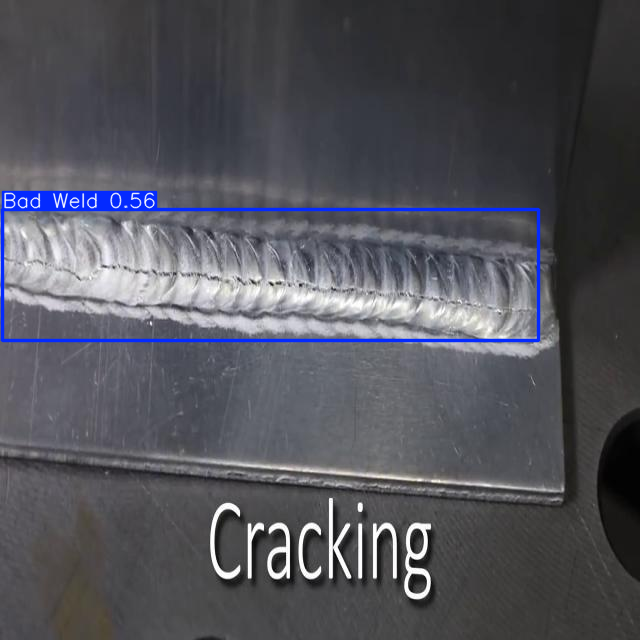

Saved 1 image to runs\detect\exp3


In [18]:
# Step 1: Import Required Libraries
import torch
import cv2
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np

# Step 2: Load the Trained YOLOv5 Model
# Replace 'best.pt' with the path to your weights file if different
model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/yolo5-welding9/weights/best.pt', force_reload=True)

# Step 3: Load and Prepare Test Image
image_path = r"C:\Users\udayu\Downloads\The Welding Defect Dataset\test\images\bad_weld_vid374_jpeg_jpg.rf.d1c904ca6a097b2c51665238ba9e1147.jpg"
img = Image.open(image_path)

# Step 4: Run Inference
results = model(img)

# Step 5: Display the Results (bounding boxes, labels, confidences)
results.print()           # Print results to console
results.show()            # Display image with predictions (in new window)
results.save()            # Save predictions to 'runs/detect/exp'

# Optional: Inline visualization in notebook
plt.imshow(results.render()[0])
plt.axis('off')
plt.title("Detected Defects")
plt.show()
